<center><h2> Semantic segmentation based on stanford campus dataset</h2></center>

In [81]:
import cv2
from pathlib import Path
from matplotlib import pyplot as plt

In [95]:
class VideoDataset:
    def __init__(self, data_root="/media/hdd/stanford_campus_dataset"):
        # 1. Get available scenes
        scenes_path = Path(data_root + "/videos").glob('./*')
        self.scenes = {scene.name: {"path": scene, "videos": {}} for scene in scenes_path}
        
        # 2. For each scene, get list of available videos
        for scene_name, scene in self.scenes.items():
            videos = scene["path"].glob("./*")
            for video_path in videos:
                scene["videos"][video_path.name] = video_path / "video.mov"
        
    def get_scenes(self):
        return [k for k, v in self.scenes.items()]
        
    def get_frame(self, scene_name, video_name, is_last=False):
        cap = cv2.VideoCapture(str(self.scenes[scene_name]["videos"][video_name]))
        if is_last:
            cap.set(cv2.CAP_PROP_POS_FRAMES, cap.get(cv2.CAP_PROP_FRAME_COUNT)-1)
        success, frame = cap.read()
        if not success:
            print(f"Can't read first frame for scene '{scene_name}' and video '{video_name}'")
        cap.release()
        return frame

In [98]:
v_dataset = VideoDataset()
print(v_dataset.get_scenes())

v_dataset.scenes["nexus"]
first_frame = v_dataset.get_frame("quad", "video0")
last_frame = v_dataset.get_frame("quad", "video0", True)

['nexus', 'coupa', 'little', 'gates', 'bookstore', 'quad', 'hyang', 'deathCircle']


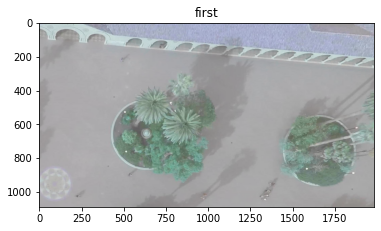

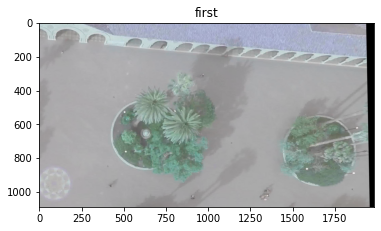

In [99]:
plt.imshow(first_frame)
plt.title('first')
plt.show()

plt.imshow(last_frame)
plt.title('first')
plt.show()
